In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
bd = pd.read_csv("data.csv")
print("DataFrame:", bd)

DataFrame:       x          y
0  -2.0 -177.00000
1  -1.8 -124.54208
2  -1.6  -85.42816
3  -1.4  -56.81664
4  -1.2  -36.32672
5  -1.0  -22.00000
6  -0.8  -12.26208
7  -0.6   -5.88416
8  -0.4   -1.94464
9  -0.2    0.20928
10  0.0    1.00000
11  0.2    0.65792
12  0.4   -0.74016
13  0.6   -3.23264
14  0.8   -6.93472
15  1.0  -12.00000
16  1.2  -18.58208
17  1.4  -26.79616
18  1.6  -36.68064
19  1.8  -48.15872
20  2.0  -61.00000


In [3]:
def ini_poblacion(tam_poblacion, num_ind, Imin, Imax):
    poblacion = np.zeros((tam_poblacion, num_ind))
    for i in range(tam_poblacion):
        for j in range(num_ind):
            poblacion[i][j] = np.random.uniform(Imin, Imax)
    return poblacion

In [4]:

def evaluar(poblacion, x, y):
    [r,c] = poblacion.shape 
    n = len(y)
    evaluarciones = np.zeros((n,r))
    fitness = np.zeros(r)
    for i in range(r):
        y_new = poblacion[i,0] + poblacion[i,1] * x + poblacion[i,2] * x**2 + poblacion[i,3] * x ** 3 + poblacion[i,4] * x ** 4 + poblacion[i,5] * x ** 5
        y_new = np.array(y_new)
        evaluarciones[:,i] = y_new
        fitness[i] = np.linalg.norm(y - evaluarciones[:,i])
    return fitness

In [5]:
def seleccion(Poblacion, fitness, ps):
    [r, c] = Poblacion.shape 
    indices_ordenados = np.argsort(fitness)
    tam_elite = int(r * ps)
    poblacion_elite = np.zeros((tam_elite, c))
    for i in range(tam_elite):
        poblacion_elite[i,:] = Poblacion[indices_ordenados[i],:]
    
    return poblacion_elite

In [6]:
def estimacion_distribucion(poblacion_elite):
    dim = poblacion_elite.shape[1]
    media = np.zeros(dim)
    stds = np.zeros(dim)

    for i in range(dim):
        media[i] = np.mean(poblacion_elite[:, i])
        stds[i] = np.std(poblacion_elite[:,i])

    return media, stds

In [7]:
def generar_nueva_poblacion(tam_pob, media, stds): 
    dim = len(media)
    nueva_pob = np.zeros((tam_pob, dim))
    for i in range(tam_pob):
        for j in range(dim):
            nueva_pob[i,j] = np.random.normal(media[j], stds[j])

    return nueva_pob

In [8]:
# Funcion para calcular la media y la stds
def BUMDA_media_stds(Pobla_elite, g, Imin, Imax, beta=1.0):
    [m, d] = Pobla_elite.shape
    z = m / ((Imax - Imin) * np.sum(np.exp(beta*g)))

    mu = np.zeros(d)
    sigma = np.zeros(d)
    for j in range(d):
        xj = Pobla_elite[:, j]
        # Media
        mu_term1 = (1 / (z * beta)) * np.sum(np.exp(beta * g) * xj)
        denom_mu = (m / ((Imax - Imin) * beta) ) + np.sum(g)
        mu_term2 = np.sum(g * xj) / denom_mu
        mu[j] = mu_term1 + mu_term2

        # Varianza
        var_term1 = (1 /( z * beta)) * np.sum(np.exp(beta * g) * (xj - mu[j])** 2)
        var_term2 = np.sum(g * (xj -mu[j]) ** 2) / np.sum(g)
        varianza = var_term1 + var_term2
        sigma[j] = np.sqrt(varianza)


    return mu, sigma

C:\Users\LUIS PC\AppData\Local\Temp\ipykernel_9020\2162471741.py:17: RuntimeWarning: overflow encountered in scalar multiply
  var_term1 = (1 /( z * beta)) * np.sum(np.exp(beta * g) * (xj - mu[j])** 2)
C:\Users\LUIS PC\AppData\Local\Temp\ipykernel_9020\2162471741.py:17: RuntimeWarning: overflow encountered in square
  var_term1 = (1 /( z * beta)) * np.sum(np.exp(beta * g) * (xj - mu[j])** 2)
C:\Users\LUIS PC\AppData\Local\Temp\ipykernel_9020\2162471741.py:18: RuntimeWarning: overflow encountered in square
  var_term2 = np.sum(g * (xj -mu[j]) ** 2) / np.sum(g)
c:\IBERO\A5QuintoSemestre\Complete Data Science\venv\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\IBERO\A5QuintoSemestre\Complete Data Science\venv\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


El mejor cromosoma es: [-914066.79248715  -30741.62240605  -14181.04072985 -531539.44027407
 -722329.09005879 1668774.30218387]


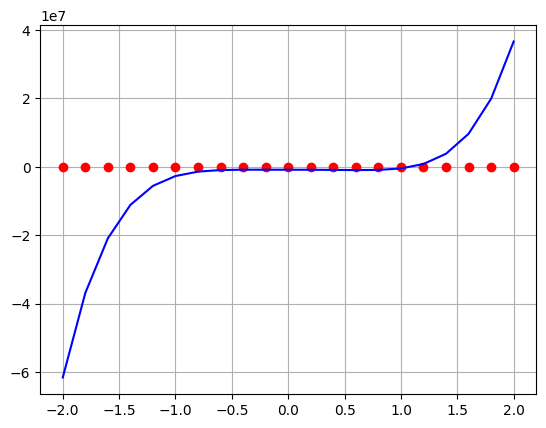

In [ ]:
x = bd["x"]
y = bd["y"]
tam_poblacion = 100
num_ind = 6
generaciones = 100
Imin = -10
Imax = 10
ps = 0.5


P = ini_poblacion(tam_poblacion, num_ind, Imin, Imax)
mejor_solucion = None
mejor_fitness = float('inf')

for k in range(generaciones):
  fitness = evaluar(P, x, y)
  P_elite = seleccion(P, fitness, ps)
  # Es el vector de solo los valores negativos de fitness
  
  #media, stds = estimacion_distribucion(P_elite)
  media, stds = BUMDA_media_stds(P_elite, g, Imin, Imax)
  nueva_poblacion = generar_nueva_poblacion(tam_poblacion, media, stds)
  P = nueva_poblacion.copy()
  actual_mejor_fitness = min(fitness)
  actual_mejor_solucion = P[np.argmin(fitness)]
  if actual_mejor_fitness < mejor_fitness:
    mejor_fitness = actual_mejor_fitness
    mejor_solucion = actual_mejor_solucion

print(f'El mejor cromosoma es: {mejor_solucion}')
mejor_y = mejor_solucion[0] + mejor_solucion[1] * x + mejor_solucion[2] * x ** 2 + mejor_solucion[3] * x ** 3 + mejor_solucion[4] * x ** 4 + mejor_solucion[5] * x ** 5
plt.plot(x, y, 'ro')
plt.plot(x, mejor_y, 'b-')
plt.grid()
plt.show()